### Binary search tree

Tree

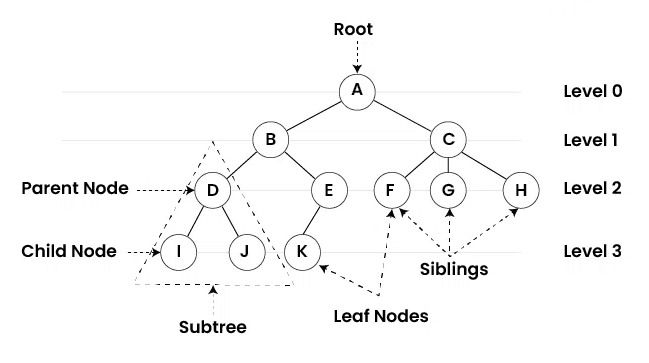

Binary tree

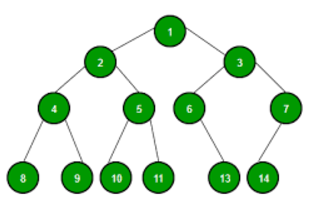

Binary search tree

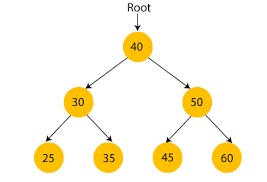

Zbalansowane (ang. balanced) vs niezbalansowane (ang. unbalanced) drzewa binarne.

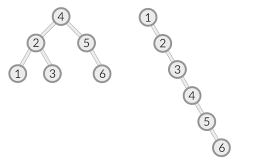

Po co nam bst?

Przeszukiwanie ma średnią złożoność obliczeniową $O(\log n)$. Najgorsza to wciąż $O(n)$ (w niezbalansowanym przypadku drzewo degeneruje się do listy i odrzucamy po jednym elemencie).

In [3]:
class Node:
    def __init__(self, key):
        self.left_child = self.right_child = None
        self.parent = None  # makes things a lot easier (especially
        # for deletion
        self.key = key
        self.value = None

    def __repr__(self):
        return f"{self.key}, {self.value}"

In [16]:
class BinarySearchTree:
    def __init__(self, root):
        self.root = None

    def __contains__(self, key) -> bool:
        ...

    def __repr__(self):
        ...

    def insert(self, key, value):
        ...

    def search(self, key):
        ...

    def delete(self, key):
        ...

    def traverse(self, order):
        ...

    ### helper methods ###
    def _delete(self, node):
        ...

    def _successor(self, node):
        ...

    def _predecessor(self, node):
        ...

    def _in_order_traversal(self):
        ...

    def _pre_order_traversal(self):
        ...

    def _post_order_traversal(self):
        ...

    def _level_order_traversal(self):
        ...

Złożoność obliczeniowa większości operacji (search, insert, delete) zależy od tego czy drzewo jest zabalansowane. Jeżeli jest to najgorszy przypadek to O(log n), ale jeżeli nie jest to O(n). Dla traversal zawsze O(n).

In [17]:
# Implementacja


In [18]:
# Use cases
